In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv("data/Data_visualization.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df = pd.get_dummies(df, columns=['LU','OWN_OCC','AC'])
print("There are {} entries in the dataframe".format(len(df)))
df.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There are 316333 entries in the dataframe


,PID,ZIPCODE,AV_TOTAL,YR_BUILT,STRUCTURE_CLASS,LIVING_AREA,RorU,HEAT_TYP,Year,AV_TOTALPerArea,...,LU_R2,LU_R3,LU_RC,OWN_OCC_N,OWN_OCC_Y,AC_C,AC_D,AC_E,AC_F,AC_N
0,2205668000_,2135,604700,1920.0,R,2834.0,R,W,2014,213.373324,...,0,1,0,1,0,0,0,0,0,1
1,2205664000_,2135,567000,1920.0,R,2952.0,R,F,2014,192.073171,...,1,0,0,0,1,0,0,0,0,1
2,2205663001_,2135,477600,1920.0,R,2390.0,R,W,2014,199.832636,...,0,0,0,0,1,0,0,0,0,1
3,2205663000_,2135,442700,1920.0,R,2347.0,R,W,2014,188.623775,...,0,0,0,0,1,0,0,0,0,1
4,2205662020_,2135,549000,1910.0,R,2545.0,R,W,2014,215.717092,...,1,0,0,0,1,0,0,0,0,1


In [3]:
df.HEAT_TYP.replace(['E','F','N','O','S','W'], ['NP','NP','NP','NP','NP','NP'], inplace=True)

X = df[['YR_BUILT', 'LIVING_AREA',
        'LU_A','LU_CD','LU_E','LU_EA','LU_R1','LU_R2','LU_R3','LU_RC',
        #'STRUCTURE_CLASS_1','STRUCTURE_CLASS_A','STRUCTURE_CLASS_B',
        #'STRUCTURE_CLASS_C','STRUCTURE_CLASS_D','STRUCTURE_CLASS_R',
        'OWN_OCC_N','OWN_OCC_Y',
        #'RorU_R','RorU_U',
        'AC_C','AC_D','AC_E','AC_F','AC_N']]
y = df[[ 'HEAT_TYP']]


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [4]:
#clf = linear_model.LogisticRegression(penalty='l2',class_weight={'P':4,'NP':0.01})
clf = linear_model.LogisticRegression(penalty='l1',class_weight='balanced')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
training_accuracy = clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
print ("Accuracy on training data: %0.4f" % (training_accuracy))
print ("Accuracy on test data:     %0.4f" % (test_accuracy))

accuracy_score(ytest,ypred)

print(classification_report(ytest,ypred))

Accuracy on training data: 0.8718
Accuracy on test data:     0.8726
             precision    recall  f1-score   support

         NP       1.00      0.87      0.93     78922
          P       0.01      0.83      0.03       162

avg / total       1.00      0.87      0.93     79084



In [6]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytest, ypred)
cnf_matrix

array([[68871, 10051],
       [   27,   135]])

In [7]:
# Confusion Matrix Visualization
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[68871 10051]
 [   27   135]]


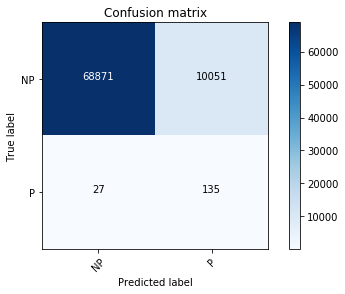

In [8]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NP','P'], 
                      title='Confusion matrix')
plt.show()

In [9]:

scores, pvalues = chi2(Xtrain,ytrain)
column_name = list(X)
coe = clf.coef_.tolist()
p_values = []
for i in pvalues:
    p_values.append(format(i,'f'))
x = pd.DataFrame(
    {'Column name': column_name,
     'P_Value': p_values,
     #'Coefficient': coe[0]
    },columns=['Column name', 'P_Value'])
x

,Column name,P_Value
0,YR_BUILT,0.000000
1,LIVING_AREA,0.000000
2,LU_A,0.267784
3,LU_CD,0.256597
4,LU_E,0.000000
5,LU_EA,0.514404
6,LU_R1,0.000000
7,LU_R2,0.000000
8,LU_R3,0.000000
9,LU_RC,0.684309
